In [1]:
import numpy as np
size = '1,936mm'

In [7]:
if size == '1,936mm':
    frequency = 657.3E9
    wavelength = (3E8/frequency) 
    k_ext = 2 *np.pi/wavelength
    data_pm = np.loadtxt('Tmatrix/' + size + '/phase_matrix.txt')
    Z11_Tmatrix = data_pm[:,1]#*1E-12
    Z22_Tmatrix = data_pm[:,3]#*1E-12
    Z33_Tmatrix = data_pm[:,4]#*1E-12
    Z44_Tmatrix = data_pm[:,5]#*1E-12
    Z12_Tmatrix = data_pm[:,2]#*1E-12
    Z34_Tmatrix = -data_pm[:,6]#*1E-12
    Tmatrix_coords = data_pm[:,0]
    Tmatrix_coords = np.radians(Tmatrix_coords)
    data_SSPs = np.loadtxt('Tmatrix/' + size + '/SSPs.txt')
    Cext_Tmatrix = data_SSPs[0] /k_ext**2#* 1E-12 #converting to meters^2
    Csca_Tmatrix = data_SSPs[1] /k_ext**2#* 1E-12
    g_Tmatrix = data_SSPs[2]
    w_Tmatrix = Csca_Tmatrix/Cext_Tmatrix
    Cbsca_Tmatrix = Z11_Tmatrix[-1] * Csca_Tmatrix
else:
    data_pm = np.loadtxt('Tmatrix/' + size + '/phase_matrix.txt')
    Z11_Tmatrix = data_pm[:,1]#*1E-12
    Z22_Tmatrix = data_pm[:,3]#*1E-12
    Z33_Tmatrix = data_pm[:,4]#*1E-12
    Z44_Tmatrix = data_pm[:,6]#*1E-12
    Z12_Tmatrix = data_pm[:,2]#*1E-12
    Z34_Tmatrix = -data_pm[:,5]#*1E-12
    Tmatrix_coords = data_pm[:,0]
    Tmatrix_coords = np.radians(Tmatrix_coords)
    data_SSPs = np.loadtxt('Tmatrix/' + size + '/SSPs.txt')
    Cext_Tmatrix = data_SSPs[0] #* 1E-12 #converting to meters^2
    Csca_Tmatrix = data_SSPs[1] #* 1E-12
    g_Tmatrix = data_SSPs[3]
    w_Tmatrix = data_SSPs[2]
    Cbsca_Tmatrix = Z11_Tmatrix[-1] * Csca_Tmatrix

In [13]:
data_pm = np.loadtxt('DDA/' + size + '/phase_matrix.txt')

Z11_DDA = data_pm[:,1]#1E-12
Z22_DDA = data_pm[:,3]#*1E-12
Z33_DDA = data_pm[:,4]#*1E-12
Z44_DDA = data_pm[:,6]#*1E-12
Z12_DDA = data_pm[:,2]#*1E-12
Z34_DDA = data_pm[:,5]#*1E-12
DDA_coords = data_pm[:,0]
DDA_coords = np.radians(DDA_coords)

data_SSPs = np.loadtxt('DDA/' + size + '/SSPs.txt')
Cext_DDA = data_SSPs[0] #* 1E-12 #converting to meters^2
Csca_DDA = data_SSPs[1] #* 1E-12
w_DDA= Csca_DDA/Cext_DDA
# g_Tmatrix = data_SSPs[3]
# w_Tmatrix = data_SSPs[2]
Cbsca_DDA = Z11_DDA[-1] * Csca_DDA

In [3]:
with open('results/' + size + '/temperature190/timings_20_230leb_15gauss.txt', 'r') as file:
    line = file.readlines()

Cext_bem = line[5]
Csca_bem = line[6]
Cbsca_bem = line[7]
g_bem = line[8]
w_bem = line[9]

Cext_bem = float(Cext_bem.replace('Cext avg: ', ''))
Csca_bem = float(Csca_bem.replace('Csca avg: ', ''))
Cbsca_bem = float(Cbsca_bem.replace('Cbsca avg: ', ''))
g_bem = float(g_bem.replace('g avg: ', ''))
w_bem = float(w_bem.replace('w avg: ', ''))

Z11_bem = np.loadtxt('results/' + size + '/temperature190/Z11_20_230leb_15gauss.txt')
Z12_bem = np.loadtxt('results/' + size + '/temperature190/Z12_20_230leb_15gauss.txt')
Z22_bem = np.loadtxt('results/' + size + '/temperature190/Z22_20_230leb_15gauss.txt')
Z33_bem = np.loadtxt('results/' + size + '/temperature190/Z33_20_230leb_15gauss.txt')
Z34_bem = np.loadtxt('results/' + size + '/temperature190/Z34_20_230leb_15gauss.txt')
Z44_bem = np.loadtxt('results/' + size + '/temperature190/Z44_20_230leb_15gauss.txt')

In [8]:
print("Error in Csca: {0:.5%}".format(abs(Csca_bem - Csca_Tmatrix)/Csca_Tmatrix))
print("Error in Cext: {0:.5%}".format(abs(Cext_bem - Cext_Tmatrix)/Cext_Tmatrix))
print("Error in Cbsca: {0:.5%}".format(abs(Cbsca_bem - Cbsca_Tmatrix)/Cbsca_Tmatrix))
print("Error in g: {0:.5%}".format(abs(g_bem - g_Tmatrix)/g_Tmatrix))
print("Error in w: {0:.5%}".format(abs(w_bem - w_Tmatrix)/w_Tmatrix))

Error in Csca: 7.11379%
Error in Cext: 7.55359%
Error in Cbsca: 9.81622%
Error in g: 0.52491%
Error in w: 0.32648%


In [14]:
print("Error in Csca: {0:.5%}".format(abs(Csca_bem - Csca_DDA)/Csca_DDA))
print("Error in Cext: {0:.5%}".format(abs(Cext_bem - Cext_DDA)/Cext_DDA))
print("Error in Cbsca: {0:.5%}".format(abs(Cbsca_bem - Cbsca_DDA)/Cbsca_DDA))
print("Error in w: {0:.5%}".format(abs(w_bem - w_DDA)/w_DDA))

Error in Csca: 6.24186%
Error in Cext: 6.70242%
Error in Cbsca: 11.81188%
Error in w: 0.34437%


In [16]:
print('Cext = {0}'.format(Cext_DDA))
print('Csca = {0}'.format(Csca_DDA))
print('Cbsca = {0}'.format(Cbsca_DDA))
print('w = {0}'.format(w_DDA))

Cext = 3.44e-06
Csca = 3.23e-06
Cbsca = 1.95810493797e-06
w = 0.938953488372093


In [9]:
print('Cext = {0}'.format(Cext_Tmatrix))
print('Csca = {0}'.format(Csca_Tmatrix))
print('Cbsca = {0}'.format(Cbsca_Tmatrix))
print('g = {0}'.format(g_Tmatrix))
print('w = {0}'.format(w_Tmatrix))

Cext = 3.4716724826260476e-06
Csca = 3.260320016315766e-06
Cbsca = 1.9147745344621924e-06
g = 0.601236665121504
w = 0.9391208510111501


In [10]:
print('Cext = {0}'.format(Cext_bem))
print('Csca = {0}'.format(Csca_bem))
print('Cbsca = {0}'.format(Cbsca_bem))
print('g = {0}'.format(g_bem))
print('w = {0}'.format(w_bem))

Cext = 3.209436635104863e-06
Csca = 3.028387763283674e-06
Cbsca = 1.7268159721910022e-06
g = 0.5980807165464223
w = 0.9421869239713402


In [ ]:
# print("Error in Csca: {0:.5%}".format(abs(Csca_bem_20 - Csca_Tmatrix)/Csca_Tmatrix))
# print("Error in Cext: {0:.5%}".format(abs(Cext_bem_20 - Cext_Tmatrix)/Cext_Tmatrix))
# print("Error in Cbsca: {0:.5%}".format(abs(Cbsca_bem_20 - Cbsca_Tmatrix)/Cbsca_Tmatrix))
# print("Error in g: {0:.5%}".format(abs(g_bem_20 - g_Tmatrix)/g_Tmatrix))
# print("Error in w: {0:.5%}".format(abs(w_bem_20 - w_Tmatrix)/w_Tmatrix))

In [ ]:

# print("Error in Csca: {0:.5%}".format(abs(Csca_bem_50 - Csca_Tmatrix)/Csca_Tmatrix))
# print("Error in Cext: {0:.5%}".format(abs(Cext_bem_50 - Cext_Tmatrix)/Cext_Tmatrix))
# print("Error in Cbsca: {0:.5%}".format(abs(Cbsca_bem_50 - Cbsca_Tmatrix)/Cbsca_Tmatrix))
# print("Error in g: {0:.5%}".format(abs(g_bem_50 - g_Tmatrix)/g_Tmatrix))
# print("Error in w: {0:.5%}".format(abs(w_bem_50 - w_Tmatrix)/w_Tmatrix))

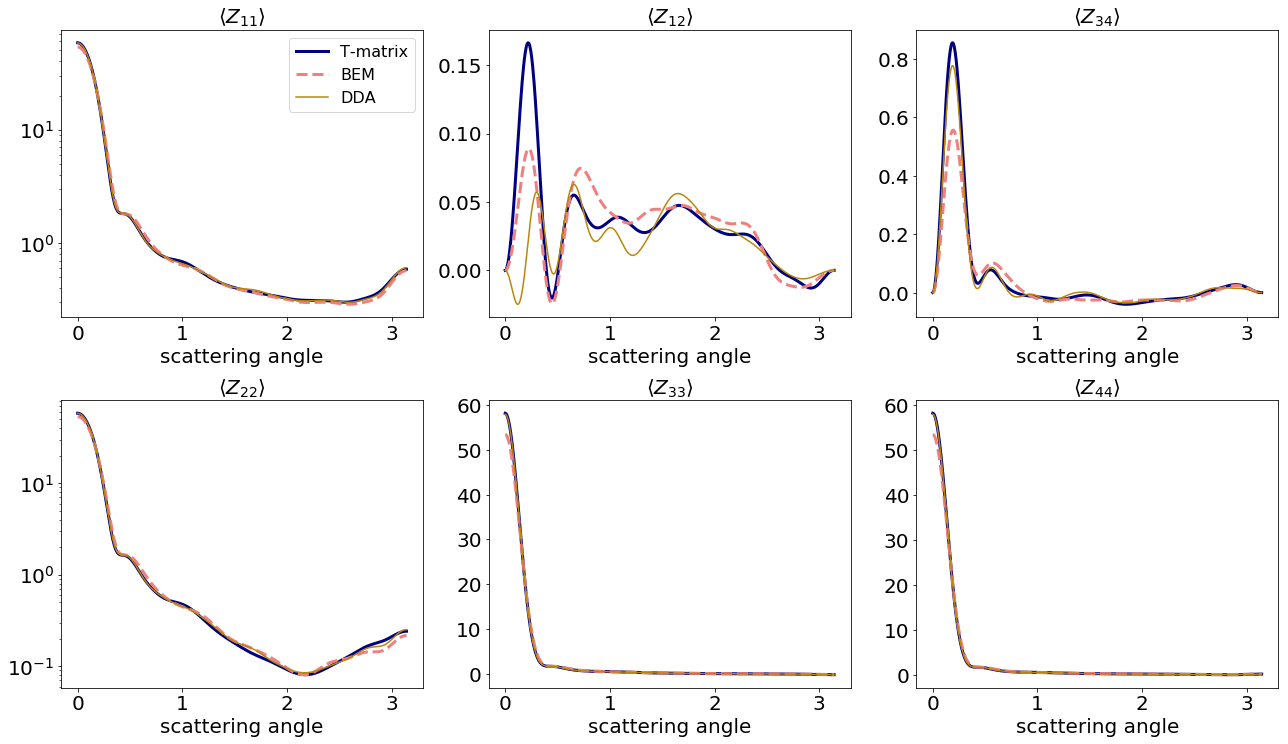

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
scaling = 4*np.pi/Csca_bem
angles_theta = np.linspace(0,np.pi,1801)

fig, axs = plt.subplots(2, 3, figsize = (18,12))

axs[0, 0].semilogy(Tmatrix_coords, Z11_Tmatrix, 'navy', linewidth=3, label = 'T-matrix')
axs[0, 0].semilogy(angles_theta, scaling*Z11_bem, '--',color ='lightcoral', linewidth=3, label = 'BEM')
axs[0, 0].semilogy(DDA_coords, Z11_DDA, label = 'DDA', color = 'darkgoldenrod')
axs[0, 0].set_title(r'$\langle Z_{11} \rangle$', fontsize = 20)
axs[0, 0].legend(fontsize = 16)
axs[0, 0].set_xlabel('scattering angle', fontsize = 20)
axs[0, 0].tick_params(axis = 'both', labelsize = 20)
# axs[0, 0].set_ylim([7E-1, 1.6])
# axs[0, 0].set_yticklabels([7E-1, 1])

axs[0, 1].plot(Tmatrix_coords, Z12_Tmatrix, 'navy', linewidth=3, label = 'T-matrix')
axs[0, 1].plot(angles_theta, scaling*Z12_bem, '--',color ='lightcoral', linewidth=3, label = 'BEM')
axs[0, 1].plot(DDA_coords, Z12_DDA,  label = 'DDA', color = 'darkgoldenrod')
axs[0, 1].set_title(r'$\langle Z_{12} \rangle$', fontsize = 20)
axs[0, 1].set_xlabel('scattering angle', fontsize = 20)
axs[0, 1].tick_params(axis = 'both', labelsize = 20)

axs[0, 2].plot(Tmatrix_coords, Z34_Tmatrix, 'navy', linewidth=3, label = 'T-matrix')
axs[0, 2].plot(angles_theta,scaling* Z34_bem, '--',color ='lightcoral', linewidth=3, label = 'BEM')
axs[0, 2].plot(DDA_coords, Z34_DDA, label = 'DDA', color = 'darkgoldenrod')
axs[0, 2].set_title(r'$\langle Z_{34} \rangle$', fontsize = 20)
# axs[0, 2].set_ylim([-0.1, 0.1])
axs[0, 2].set_xlabel('scattering angle', fontsize = 20)
axs[0, 2].tick_params(axis = 'both', labelsize = 20)

axs[1, 0].plot(Tmatrix_coords, Z22_Tmatrix, 'navy', linewidth=3, label = 'T-matrix')
axs[1, 0].plot(angles_theta, scaling*Z22_bem, '--',color ='lightcoral', linewidth=3, label = 'BEM')
axs[1, 0].semilogy(DDA_coords, Z22_DDA, label = 'DDA', color = 'darkgoldenrod')
axs[1, 0].set_title(r'$\langle Z_{22} \rangle$', fontsize = 20)
axs[1, 0].set_xlabel('scattering angle', fontsize = 20)
axs[1, 0].tick_params(axis = 'both', labelsize = 20)

axs[1, 1].plot(Tmatrix_coords, Z33_Tmatrix, 'navy', linewidth=3, label = 'T-matrix')
axs[1, 1].plot(angles_theta, scaling*Z33_bem, '--',color ='lightcoral', linewidth=3, label = 'BEM')
axs[1, 1].plot(DDA_coords, Z33_DDA, label = 'DDA', color = 'darkgoldenrod')
axs[1, 1].set_title(r'$\langle Z_{33} \rangle$', fontsize = 20)
axs[1, 1].set_xlabel('scattering angle', fontsize = 20)
axs[1, 1].tick_params(axis = 'both', labelsize = 20)

axs[1, 2].plot(Tmatrix_coords, Z44_Tmatrix, 'navy', linewidth=3, label = 'T-matrix')
axs[1, 2].plot(angles_theta,scaling* Z44_bem, '--',color ='lightcoral', linewidth=3, label = 'BEM')
axs[1, 2].plot(DDA_coords, Z44_DDA, label = 'DDA', color = 'darkgoldenrod')
axs[1, 2].set_title(r'$\langle Z_{44} \rangle$', fontsize = 20)
axs[1, 2].set_xlabel('scattering angle', fontsize = 20)
axs[1, 2].tick_params(axis = 'both', labelsize = 20)

# plt.suptitle(r'$X=5$', fontsize = 24)
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
# plt.savefig(path_to_results +'/phase_matrix.png', format = 'png', dpi = 100)